**Math 345M Homework 4**

**Author: Cole Pendergraft**

**Chapter 7 Problems: 85 (use both the Normal Approximation and the Binomial Distribution), 88, 89, 90, 96, 97**

**Chapter 8 Problems: 96, 98, 100, 102**

In [5]:
import numpy as np
import scipy.stats as sp
from scipy.integrate import quad

import matplotlib.pyplot as plt

**Problem 7.85:** Suppose in a local Kindergarten through 12th grade (k - 12) school district, 53 percent of the population favor a charter school for grades K through 5. A simple random sample of 300 is surveyed. Calculate the following using normal approximation to the binomial distribution.

**a) Find the probability that less than 100 favor a charter school for grades K through 5.**

We have that our sample size is 300, and that 53% of our population is for grades K through 5. We have a constant population n = 300, independent trials, an unchaging probability p = 0.53, and two outcomes per trial, so we know that we have a binomial distribution. So X ~ B(300, 0.53).

First, we approach this the problem as a binomial distribution. Since we are looking for all values to the left 100, we want to use our cumulative distribution function, which computes the likelihood of 0 to x successes in n trials. We are looking at values strictly less than 100, so we would like to use x = 99. However, it should be noted that all values less than or equal to 99.4 will be rounded down to 99, and all values greater than or equal to 99.5 will be rounded up to 100, so we would actually like to use x = 99.4.

In [114]:
n = 300  # Our population size
p = 0.53  # Our probability

print("The probability that less than 100 favor a charter school:", sp.binom.cdf(99.4, n, p))

The probability that less than 100 favor a charter school: 2.2630447766741137e-12


So when using a binomial distribution, we approximate that the probability that less than 100 favor a charter school for grades K through 5 is about $0.0226*10^{-10}$%.

Now, we attempt the same thing, but instead use a normal approximation of the binomial distribution. We are able to to make a normal approximation to the binomial if, when given a population n, a probability p, and a value q = 1 - p, we have that $n*p > 5$ and $n*q > 5$. If the conditions are met, we then have that our mean $\mu = n*p$ and our standard deviation $\sigma = \sqrt{npq}$.

Our first step, then, is to check if we can create a normal approximation to this binomial distribution. I wrote a function to handle the checking and apprxoimation of the normal distribution.

In [115]:
def normApprox(n, p, x):
    """Expects integer inputs for population n, probability p, and sample size x."""
    q = 1 - p
    if (n*p > 5 and n*q > 5):
        mu = n*p
        std = (n*p*q)**(1/2)
        print("Normal approximation possible.")
        print("Mean of normal approximation:", mu)
        print("Standard deviation of normal approximation:", std)
        print("Percentile for all values less than or equal to", x, "is", sp.norm.cdf(x, mu, std))
        return sp.norm.cdf(x, mu, std)
    else:
        print("Normal approximation not possible.")
        return 0

In [116]:
normApprox(n, p, 99.4)

Normal approximation possible.
Mean of normal approximation: 159.0
Standard deviation of normal approximation: 8.64465152565446
Percentile for all values less than or equal to 99.4 is 2.7039389713348153e-12


2.7039389713348153e-12

So in both cases, we end up with with probabilities that are essentially zero, with the binomial distribution suggesting that the probability that less than 100 will favor a charter for grades K through 5 is $0.0226*10^{-10}$%, and the normal distribution suggesting a tighter approximation of $0.0270*10^{-10}$%. We know that the binomial distribution is a more accurate approximation, as this is a binomially distributed problem and we are using computer software to perform calculations, but we can see that our estimation from the normal approximation is only off by a small margin, which means that this normal approximation is extremely accurate, and therefore more useful for someone who doesn't have access to computational software and doesn't want to deal with extreme factorials associated with large binomial distributions.

**b) Find the probability that 170 or more favor a charter school for grades K through 5.**

Here we are looking at a >= situation, so we can again use our cumulative distribution function, so long as this time we take 1 - cdf. This is beacause if we have a sample of a population x, our cdf function computes all values to the left of and including x, so 1 - cdf would be all values greater than x. If we want to find all values to the right of and including 170, which equates to all values strictly to the right of 169, we would simply need to find the cdf using a sample of 169, and 1 - that will give us all values strictly to the right of 169. Further, we should remember that all values less than or equal to 169.4 will be rounded down to 169, and all values greater than or equal to 169.5 will be rounded up to 170, so we really want to use x = 169.4.

First we approach this using the Binomial distribution X~B(300, 0.53) and our sample size x = 169.4.

In [117]:
print("BinomDist approximation:", 1 - sp.binom.cdf(169.4, n, p))

BinomDist approximation: 0.11211852663015653


So using a binomial distribution suggests that there is approximately a 11.2% chance that 170 or more favor a charter school for grades K through 5.

Now we perform the calculation again using the my function:

In [119]:
1 - normApprox(n, p, 169.4)

Normal approximation possible.
Mean of normal approximation: 159.0
Standard deviation of normal approximation: 8.64465152565446
Percentile for all values less than or equal to 169.4 is 0.8855226772068984


0.11447732279310163

Once again, our normal approximation probability is very slightly off at a probability of 11.4% compared to the binomial distribution probability of 11.2%. More evidence of how accurate the normal approximation to the binomial distribution can be.

This answer disagrees slightly with the textbook solution, but I found that if I use x = 169.5 then my answer matches. I can only presume, then, that for whatever reason the textbook assumes that 169.5 is rounded down to 169 and not up to 170, is I would've thought. The convention I'm used to us that .5 and above rounds up, and .4 and below rounds down.

**c) Find the probability that no more than 140 favor a charter school for grades K through 5.**

Now we are seeking the probability that <= 140 favor a charter school for grades K through 5, which is how the cumulative distribution function works normally so we don't need to do anything fancy here, other than remebering the rounding rules I've discussed previously, which suggest we should be using x = 140.4

Once again starting with the binomial distribution:

In [124]:
print("BinomDist approximation:", sp.binom.cdf(140.4, n, p))

BinomDist approximation: 0.016256624540866373


So according to the Binomial Distribution, there is a 1.63% chance that no more than 140 favor a charter school for grades K through 5.

Now we do it again using our normal approximation:

In [125]:
normApprox(n, p, 140.4)

Normal approximation possible.
Mean of normal approximation: 159.0
Standard deviation of normal approximation: 8.64465152565446
Percentile for all values less than or equal to 140.4 is 0.01571367112505943


0.01571367112505943

Our normal approximation suggests there is a 1.60% chance that no more that 140 favor a charter school for grades K through 5.

Again, my numbers here disagree with the textbook, but if I use 140.5 then the answers match, just like in the previous part. I cannot wrap my head around rounding down at 140.5, I would have assumed that 140.5 rounds to 141 which breaks our "no more than 140" criterion.

**d) Find the probability that there are fewer than 130 that favor a charter school for grades K through 5.**

This is another strictly less than situation, where we are looking at values strictly less than 130. Thus, taking into cosideration normal rounding rules, we should use x = 129.4, as that will calculate the probability of 0 to 129.4 successes, with all values on the range [129.0, 129.4] presumed to round down to 129 (though of course the book will disagree with this).

First, we us a binomial distribution:

In [126]:
print("BinomDist approximation:", sp.binom.cdf(129.4, n, p))

BinomDist approximation: 0.0003244529982507086


And now using a normal approximation to the binomial distribution:

In [129]:
normApprox(n, p, 129.4)

Normal approximation possible.
Mean of normal approximation: 159.0
Standard deviation of normal approximation: 8.64465152565446
Percentile for all values less than or equal to 129.4 is 0.0003084394537498233


0.0003084394537498233

So with the binomial distribution, we have a 0.0324% chance that there are fewer than 130 that favor a charter school, and with the normal approximation we have a 0.0308% chance. My value is now agreeing with the solution in the textbook, which is 0.0003, which I think is again just related to rounding discrepancies.

**e) Find the probability that exactly 150 favor a charter school for grades K thourgh 5.**

Now that we are looking at an exact sample size of 150, we can use our binom.pmf function and norm.pdf functions, which work nearly identical to the cdf function except for they compute the probability of exactly x successes in n trials rather than o to x successes in n trials. 

First using the binomial distribution:

In [132]:
print("BinomDist approximation:", sp.binom.pmf(150, n, p))

BinomDist approximation: 0.02679633215069725


So our binomial distribution suggests that there is a 2.68% chance that exactly 150 favor a charter school.

I'm not going to write another function just for this one problem, so I will just use the norm.pdf function with our known mean and standard deviation of the normal approximation.

In [136]:
print("NormDist approximation:", sp.norm.pdf(150, 159, 8.6447))

NormDist approximation: 0.026840860811729057


Anour normal distribution approximation is now the closest it has ever been, also at about a 2.68% chance that 150 favor a charter school.

=========================================================================================================================

**Problem 7.88:** Suppose that the length of research papers is uniformly distributed from ten to 25 pages. We survey a class in which 55 research papers were turned in to a professor. The 55 research papers are considered a random collection of all papers. We are interested in the average length of the research papers.

**a) In words, what is the random variable $X$?**

As per the problem description, the random variable X is the length of a research paper.

**b) What is the distribution of $X$?**

The problem states that we have uniform distribution of paper lengths from 10 to 25, so our distribution of X is U(10, 25).

**c) Find $\mu_X$.**

We know that we can find $\mu_X$ of a uniform distribution U(a, b) by taking $(a + b) \over 2$:

Or we could use scipy, as, once again, scipy includes a .mean module for uniform distributions. After a lot of reading up on scipy.uniform, I have discerned that our first argument is the lower bound to our uniform distribution, and the second argument is the scale, or range, of the distribution. We know that the range of a data set can be found by subtracting the smallest value from the largest value, so here we have scale = 25 - 10 = 15.

In [157]:
sp.uniform.mean(10, 15)

17.5

Thus, $\mu_X$ = 17.5.

**d) Find $\sigma_X$.**

Now that we know how the arguments for scipy uniform distributions works, we can employ scipy again here to find the standard deviation of our data set:

In [158]:
sp.uniform.std(10, 15)

4.330127018922194

Thus, $\sigma_X$ = 4.33.

**e) What is the random variable $\bar X$?**

We know from the central limit theorem that $\bar X$ consists of sample means, so the random variable $\bar X$ is the *average* length of the 55 selected research papers.

**f) Give the distribution of $\bar X$.**

The central limit theorem tells us that if we take random samples of size n from our distribution $X$ (which can be any kind of distribution) with $\mu_X$ and $\sigma_X$, then as n increases, the random variable $\bar X$ tends to be normally distributed as N($\mu_\bar X$ = $\mu_X$, $\sigma_\bar X$ = $\sigma_X \over \sqrt{n}$). We have $\mu_X = 17.5$, $\sigma_X = 4.33$, and $n = 55$.

In [182]:
def xBarDist(n, mu, sigma):
    """ Calculates the distribution of X bar """
    new_sigma = sigma/(n**(1/2))
    print("X bar mean:", mu)
    print("X bar std:", new_sigma)
    return None

In [183]:
xBarDist(55, 17.5, 4.33)

X bar mean: 17.5
X bar std: 0.5838570808931677


Thus, we have that $\mu_\bar X$ = 17.5 and $\sigma_\bar X$ = 0.58, so our distribution of $\bar X$ ~ N(17.5, 0.58)

**g) In words, what is $\Sigma$X**?

According to the central limit theorem for sums, the random variable $\Sigma X$ consists of sums. Since we are actually interested in $\bar X$ in this problem and not $X$, the random variable $\Sigma X$ is the sum of the lengths of all 55 research papers (rather than being the sum of all the page lengths).

**h) Give the distribution of $\Sigma$X**.

The central limit theorem for sums also states that if we take samples of size n from our distribution $X$ (which can be any type of distribution) with $\mu_X$ and $\sigma_X$, then as n increases, the random variable $\Sigma X$ tends to be normally distrbuted as $N(\mu_{\Sigma X} = n*\mu_ X, \sigma_{\Sigma X} = \sqrt{n}*\sigma_ X)$. Since we are concerned with $\bar X$ in this problem and not $X$, we want to use the distribution associated with $\bar X$ to calculate the distribution associated with $\Sigma X$. Our distribution of $\bar X$ is N(17.5, 0.58) with a sample of 55, so we have $n = 55$, $\mu_\bar X = 17.5$, and $\sigma_\bar X = 0.58$, thus:

In [184]:
def sigmaXDist(n, mu, sigma):
    """ Calculates the distribution of Sigma X """
    new_mu = n*mu
    new_sigma = (n**(1/2))*sigma
    print("Sigma X mean:", new_mu)
    print("Sigma X std:", new_sigma)
    return None

In [185]:
sigmaXDist(55, 17.5, 0.58)

Sigma X mean: 962.5
Sigma X std: 4.301395122515484


So we have $\Sigma X$ ~ N(962.5, 4.3).

**i) Without doing any calculations, do you think that it's likely that the professor will need to read a toal of more than 1050 pages? Why?**

Definitely not, our average total pages for the 55 papers is about 962 and our standard deviation is only 4.3. We know that 99% of all values lie within three standard deviations of the mean, and it doesn't take computations to see that 3 standard deviations in this case is only about +/- 13 to the mean. The difference between 1050 and 962 is just about +90, which is significantly bigger than even three standard deviations, so it would be extremely unlikely that the teacher had to read 1050 pages or more.

**j) Calculate the probability that the professor will need to read a total of more than 1050 pages.**

Now we get to go back to using our cumulative distribution function. In this question, we are concerning ourselves not with $X$ or $\bar X$, but with $\Sigma X$ as that random variable deals with totals and sums, and in this case we are looking at a *total* of more than 1050 pages. We know that our distribution for $\Sigma X$ is N(962.5, 4.3), which is a normal distribution so we can use norm.cdf. We are looking for strictly greater than 1050, which means we should calculate the cdf for 1050, which will give us the probability for less than or equal to 1050, and then subtract that from 1 to find it's inverse, which is the probability for strictly greater than 1050. We don't need to worry about rounding weirdness with this problem, as in this situation it is possible to have fractional page lengths so we don't need to round values for them to make sense (170.3 people doesn't make sense in the previous problem so we have to round that value, but 15.7 pages does make sense in this one so no rounding is needed).

In [203]:
1 - sp.norm.cdf(1050, 962.5, 4.3)

0.0

Unsurprisingly, it seems the probability that the teacher has to read more than 1050 pages is 0%.

**k) Why is it so unlikely that the average length of the papers will be less than 12 pages?**

Well, according to our distribution for $\bar X$ we have that the average paper lengths are about 17.5 with a standard deviation of just 0.58, so a paper length of 12 would be something like 10 standard deviations away from our average, which would just be an insane outlier. It's difficult to determine exactly *why* it is so unlikely the average length will be less than 12 pages with just the information given, as we have no insight into the teacher's rules or teaching strategy. Perhaps the professor limits your highest possible grade based on page length, so a 12 page paper can earn nothing greater than a B, this would encourage students to go above a page length of 12. But there just isn't enough info to make definitive a statement as to *why*, statistical information is just quantative representations of population behavior, it doesn't provide us with qualatative explantions as to why we see certain behavior, just data that we then use our own knowledge and understanding to try to explain, and we don't have enough knowledge about this particular situation to try to make definitive explanations about average paper length trends.

=========================================================================================================================

**Problem 7.89:** Salaries for teachers in a particular elementary school district are normally distributed with a mean of 44,000 dollars and a standard deviation of 6,500 dollars. We randomly survey ten teachers from that district.

**a) Find the 90th percentile for an individual teacher's salary.**

In this case we are looking at indiviudal teacher's salaries, so we are using random variable $X$ which we have been told is normally distributed with $\mu_X$ = 44000 and $\sigma_X$ = 6500, so $X$~N(44000, 6500). 

So we have been giving a percentile, mean, and standard deviation and we would like to calculate the value associated with that percentile. We can do this using the percent point function, as it computes a value x such that

$F_x$(x) = P(X $<=$ x)

Scipy contains a .ppf module for normal distributions that takes arguments x = percentile, $\mu$ = mean, and $\sigma$ = standard deviation, so we can use that to compute this value:

In [187]:
sp.norm.ppf(.9, 44000, 6500)

52330.0851760399

So the 90th percentile for individual teacher's salary is 53330.09 dollars.

**b) Find the 90th percentile for the average teacher's salary.**

Now we are looking at the *average* teacher's salary, which means we want to consider $\bar X$ instead of $X$. So we need the mean and standard deviation of $\bar X$ 

In [188]:
xBarDist(10, 44000, 6500)

X bar mean: 44000
X bar std: 2055.4804791094466


So we have $\bar X$ ~ N(44000, 2055.48) and we are looking for the value associated with the 90th percentile. All we need to do use is the ppf function again, this time with $\bar X$.

In [189]:
sp.norm.ppf(.9, 44000, 2055.48)

46634.20361194562

So the 90th percentile for average teacher's salary is 46634.20 dollars.

=========================================================================================================================

**Problem 7.90:** The average length of a maternity stay in a U.S. hospital is said to be 2.4 days with a standard deviation of 0.9 days. We randomly survey 80 women who recently bore children in a U.S. Hospital.

**a) In words, define the random variable X.**

The random variable X is the number of days of a maternity stay in a US hospital.

**b) In words, define the random variable $\bar X$.**

Since X is the number of days of a maternity stay in a US hospital, $\bar X$ is the *average* number of days of a maternity stay of the 80 randomly chosen women.

**c) Give the distribution of $\bar X$.**

In [190]:
xBarDist(80, 2.4, 0.9)

X bar mean: 2.4
X bar std: 0.10062305898749054


Thus, $\bar X$ ~ N(2.4, 0.1).

**d) In words, define $\Sigma X$.**

Unlike the previous problem, we are not necessarily focused on the average lengths for the 80 women, so we then default to the assumption $\Sigma X$ is related to X and not $\bar X$, meaning that $\Sigma X$ is the total length of the maternity stay for the 80 randomly chosen women.

**e) Give the distribution of $\Sigma X$.**

Since $\Sigma X$ is related to X and not $\bar X$, we use $\mu_X$ and $\sigma_X$ to find this distribution, instead of $\mu_\bar X$ and $\sigma_\bar X$.

In [192]:
sigmaXDist(80, 2.4, 0.9)

Sigma X mean: 192.0
Sigma X std: 8.049844718999244


So $\Sigma X$ ~ N(192, 8.05)

**f) Is it likely that an individual stayed more than five days in the hospital? Why or why not?**

The question is essentially asking about the probability that a woman stayed strictly greater than a total of 5 days or more in the hospital, and the word *individual* is our cue to use X instead of $\Sigma X$. We should then use our cdf function to find the probability that an indiviudal stayed <= 5 days in the hospital , and then subtract that value from 1, which will in turn give us the probability that an individual stayed > 5 days in the hospital. Just like the previous problem, we don't need to worry about rounding here like we did in problem 7.85 because fractional day lengths makes sense.

In [205]:
1 - sp.norm.cdf(5, 2.4, 0.9)

0.0019330282699818735

So there is only about a .2% chance that an individual stayed more than five days in the hospital, making it highly unlikely that we have that outcome.

**g) Is it likely that the average stay for the 80 women was more than five days? Why or why not?**

This is the same question as the previous one, but since we are talking about averages we use $\bar X$ this time instead of X.

In [210]:
1 - sp.norm.cdf(5, 2.4, 0.1)

0.0

So there is about a 0% chance that the average stay for the 80 women was more than five days, making it highly unlikely we have that outcome.

**h) Which is more likely:**

h.1) An individual stayed more than five days.

Based on the data from the previous part, this is the more likely outcome.

h.2) The average stay of 80 women was more than five days.

**i) If we were to sum up the women's stays, is it likely that, collectively they spent more than a year in the hospital? Why or why not?**

Now we are seeking the probability that the total length of the 80 women's stays is strictly greater than 365. Since we are now discussing totals, we use $\Sigma X$. We use the cdf function to compute the how likely it is that the total stay length is <= 365 and then subtract that value from 1, giving us the probability that the total stay length is > 365.

In [211]:
1 - sp.norm.cdf(365, 192, 8.05)

0.0

So there is about a 0% chance that the 80 women collectively spent more than a year in the hospital, making this outcome highly unlikely.

=========================================================================================================================

**Problem 7.96:** A typical adult has an average IQ score of 105 with a standard deviation of 20. If 20 randomly selected adults are given an IQ test, what is the probability that the sample mean scores will be between 85 and 125 points?

We are dealing with sample means here so we have to take X ~ N(105, 20) and find the distribution of $\bar X$.

In [221]:
xBarDist(20, 105, 20)

X bar mean: 105
X bar std: 4.47213595499958


So $\bar X$ ~ N(105, 4.47).

We know from previous assignments that if we want to find the probability of scores falling between two values, then we should take the cdf of those two values and subtract the resulting probabilities. We did a very similar problem on Homework 3; problem 6.84.

In [233]:
sp.norm.cdf(125, 105, 4.47) - sp.norm.cdf(85, 105, 4.47)

0.9999923328243889

Thus, there approximately a 100% chance that the mean scores for the 20 adults are beween 84 and 125.

=========================================================================================================================

**Problem 7.97:** Certain coins have an average weight of 5.201 grams with a standard deviation of 0.065 g. If a vending machine is designed to accept coins whose weights range from 5.111 g to 5.291 g, what is the expected number of rejected coins when 280 randomly selected coins are inserted into the machine?

We start with a normally distributed set with a mean of 5.201 and a std of 0.065. We are talking abou average coin totals here so we need to compute our $\bar X$ distribution:

In [268]:
xBarDist(280, 5.201, 0.065)

X bar mean: 5.201
X bar std: 0.0038844929803367794


We can solve this problem by figuring out the probability of a coin in our distribution falling between 5.111 and 5.291 and then subtracting that value from 1, which will give us the probabilty of rejecting coins. We established in the last problem that to calculate the probability of something occuring between two values, we calculate the cdf associated with each value and subtract them.

In [269]:
sp.norm.cdf(5.291, 5.201, 0.00388) - sp.norm.cdf(5.111, 5.201, 0.00388)

1.0

So it would seem that we have a 100% chance that our average coin weight will fall between 5.111 and 5.291, meaning that there is a 0% chance of rejecting any coins. 

=========================================================================================================================

**Problem 8.96:** Announcements for 84 upcoming engineering conferences were randomly picked from a stack of IEEE Spectrum magazines. The mean length of the conferences was 3.94 days, with a standard deviation of 1.28 days. Assume the underlying population is normal.

**a) In words, define the random variables X and $\bar X$.**

The random variable X represents the length of engineering conferences.

The random variable $\bar X$ represents the mean length of the 84 engineering conferences.

**b) Which distribution should you use for this problem? Explain your choice.**

We should use the distribution for $\bar X$ because we don't actually know anything about the underlying population, save that it is normal.

In [281]:
xBarDist(84, 3.94, 1.28)

X bar mean: 3.94
X bar std: 0.13965944975103514


**c) Construct a 95% confidence interval for the population mean length of engineering conferences.**

c.1) State the confidence interval.

Scipy comes with the t.interval module that we can use to compute this confidence interval. If we pass into this funtion our confidence level of 0.95, our mean of 3.94, our standard deviation of 0.13965944975103514, and our population size 84,the function will return the endpoints of the range that contains 95% of the distribution.

In [285]:
print("Our confidence interval is", sp.t.interval(0.95, 84, 3.94, 0.13965944975103514))

Our confidence interval is (3.662271868165308, 4.217728131834692)


c.2) Sketch the graph.

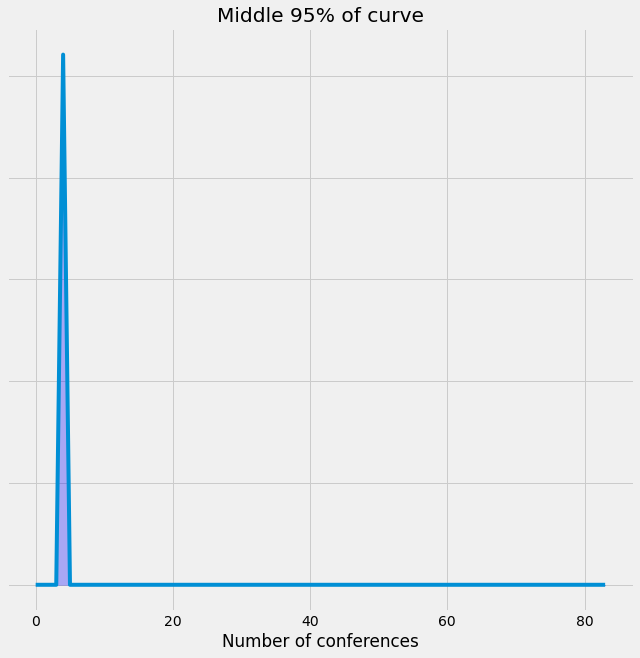

In [343]:
# I am not good with matplotlib, I'm still learning how it all works. Somehow it is the most complicated thing I have
# had to learn this entire term. This code is pulled straight from a lab I did with my lab group, and it clearly has not
# worked properly. I have already spent hours trying to troubleshoot the graph display and it just isn't working, and it
# has taken so long that this assignment is now late. I feel it's better at this point to just move on and finish the
# rest of the assignment than to keep trying to make this work.

x_int = np.arange(0, 84, 1)
y = sp.norm.pdf(x_int, 3.94, 0.13965944975103514)
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('fivethirtyeight')
ax.plot(x_int,y)
ax.fill_between(x_int,y,0, alpha=0.3, color='b')
ax.set_xlabel('Number of conferences')
ax.set_yticklabels([])
ax.set_title('Middle 95% of curve')

plt.show()

c.3) Calculate the error bound.

We calculate the error bound of the confidence interval by subtracting the upper limit from the lower limit and dividing the whole thing by two. Our upper limit is 4.217728131834692 and our lower limit is 3.662271868165308, so we have:

In [344]:
print("The error bound is:", (4.217728131834692 - 3.662271868165308)/2)

The error bound is: 0.2777281318346918


=========================================================================================================================

**Problem 8.98:** A sample of 16 small bags of the same brand of candies was selected. Assume that the population distribution of bag weights is normal. The weight of each bag was then recorded. The mean weight was two ounces with a a standard deviation of 0.12 ounces. The population standard deviation is known to be 0.1 ounce.

**a)**

a.1) Find $\bar x$.

$\bar x$ is the sample mean, which we are told is 2 ounces.

a.2) Find $\sigma_x$.

$\sigma_x$ is the sample standard deviation, which we are told is 0.12 ounces.

a.3) Find $s_x$.

$s_x$ is our sample size, which is 16.

**b) In words, define the random variable X.**

The random variable X is the weights of the bags of candies.

**c) In words, define the random variable $\bar X$.**

The random variab $\bar X$ is the mean weights of our 16 sample bags.

**d) Which distribution should you use for this problem?**

**e) Construct a 90% confidence interval for the population mean number of letters campers send home.**

e.1) State the confidence interval.

In [352]:
print("Our confidence interval is", sp.t.interval(0.90, 16, 2, 0.12))

Our confidence interval is (1.7904939588468511, 2.2095060411531486)


e.2) Sketch the graph.

I have to skip this part, I just don't have the time to struggle with matplotlib right now. I had a brutal week, this assignment is already late, it's now 4 in the morning and I've been struggling tryint to make matplotlib work with me for hours, it just feels more beneficial at this point to get this finished as soon as possible so it isn't any later than it already is and try to get to bed.

e.3) Calculate the error bound.

In [353]:
print("The error bound is:", (2.2095060411531486 - 1.7904939588468511)/2)

The error bound is: 0.20950604115314875


**f) Construct a 98% confidence interval for the population mean weight of the candies.**

f.1) State the confidence interval

In [363]:
print("Our confidence interval is", sp.t.interval(0.98, 16, 2, 0.12))

Our confidence interval is (1.6899815377679035, 2.3100184622320965)


f.2) Sketch the graph

f.3) Calculate the error bound

In [364]:
print("The error bound is:", (2.3100184622320965 - 1.6899815377679035)/2)

The error bound is: 0.3100184622320965


**g) Explain why the confidence interval in part f is larger than the confidence interval in part e.**

The confidence interval is larger because 98% makes up a larger percentage of the values. We are calculating a bigger area under the curve in part f, so we have a larger confidence interval.

**h) In complete sentences, give an interpretation of what the interval in part f means.**

Part (f) suggests that we can be 98% confident that the population mean weight of the candies lies between 1.69 ounces and 2.31 ounces.

=========================================================================================================================

**Problem 8.100:** What is meant by the term "90% confident" when constructing a confidence interval for a mean?

a) If we took repeated samples, approximately 90% of the samples would produce the same confidence interval.

b) If we took repeated samples, approximately 90% of the confidence intervals calculated from those samples would contain the sample mean.

**c) If we took repeated samples, approximately 90% of the confidence intervals calculated from those samples would contain the true value of the population mean.**

C is the correct answer, as the confidence interval shows the probability that the true population parameter lies within a confidence limit.

d) If we took repeated samples, the sample mean would equal the population mean in approximately 90% of the samples.

=========================================================================================================================

**Problem 8.102:** The American Community Survey (ACS), part of the United States Census Bureau, conducts a yearly census similar to the one taken every ten years, but with a smaller percentage of participants. The most recent survey estimates with 90% confidence that the mean household income in the U.S. falls between 69720 dollars and 69922 dollars. Find the point estimate for mean U.S. household income and the error bound for mean in U.S. Household Income.

The point estimate is just a fancy way of saying that we want to find the sample mean, which we can compute from our confidence interval by taking our upper limit + lower limit all divided by two.

In [365]:
print("Sample mean is:", (69922 + 69720)/2)

Sample mean is: 69821.0


We calculate the error bound of our confidence interval by taking the upper bound - lower bound all divided by two.

In [366]:
print("Error bound is:", (69922 - 69720)/2)

Error bound is: 101.0
